In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

In [2]:
gdown.download_folder(id='1secHzDuT4mZjxC51K4gsBnX4WyOrjxtG')

Retrieving folder list


Processing file 1G07GesNKEahinTaJABRcmSMsYOXrltIe Monthly_Macroeconomic_Factors.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1G07GesNKEahinTaJABRcmSMsYOXrltIe
To: /content/factors influencing usa homes price/Monthly_Macroeconomic_Factors.csv
100%|██████████| 31.7k/31.7k [00:00<00:00, 16.2MB/s]
Download completed


['/content/factors influencing usa homes price/Monthly_Macroeconomic_Factors.csv']

In [3]:
df = pd.read_csv('/content/factors influencing usa homes price/Monthly_Macroeconomic_Factors.csv')
df

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1987-01-01,63.735,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5
1,1987-02-01,64.134,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1
2,1987-03-01,64.470,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0
3,1987-04-01,64.974,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2
4,1987-05-01,65.549,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1
...,...,...,...,...,...,...,...,...,...
418,2021-11-01,276.092,159.94283,117.26923,205122000.0,4.2,6.97022,3.0675,15470.8
419,2021-12-01,278.681,157.33822,117.62954,205119000.0,3.9,-1.19019,3.0980,15442.7
420,2022-01-01,282.060,158.10031,118.61934,207397000.0,4.0,-6.00027,3.4450,15163.5
421,2022-02-01,287.307,155.27345,119.70281,207396000.0,3.8,-2.29249,3.7625,15173.6


In [4]:
df.isnull().sum()

Date                      0
House_Price_Index         0
Stock_Price_Index         0
Consumer_Price_Index      0
Population                0
Unemployment_Rate         0
Real_GDP                  0
Mortgage_Rate             0
Real_Disposable_Income    0
dtype: int64

In [5]:
pd.to_datetime(df['Date'])

0     1987-01-01
1     1987-02-01
2     1987-03-01
3     1987-04-01
4     1987-05-01
         ...    
418   2021-11-01
419   2021-12-01
420   2022-01-01
421   2022-02-01
422   2022-03-01
Name: Date, Length: 423, dtype: datetime64[ns]

In [6]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [7]:
l = list(df.columns)
l = l[1:-1]

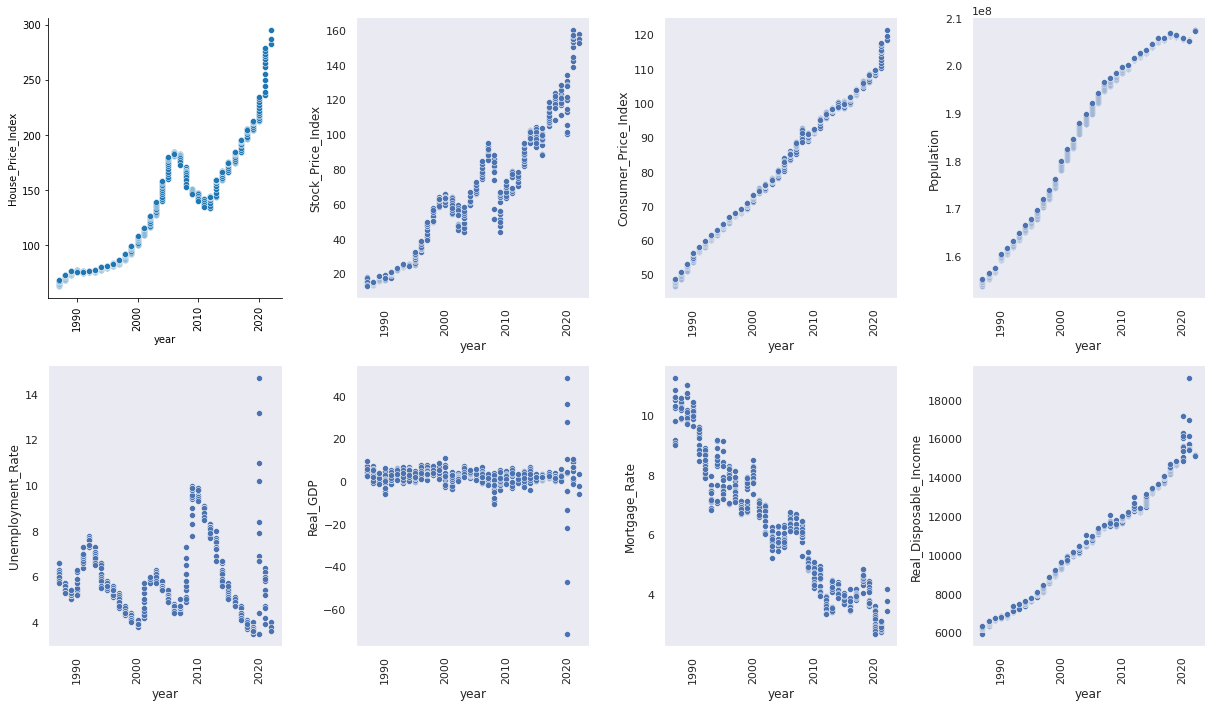

In [8]:
plt.figure(figsize=(17,10))

for i in range(len(l)):
  plt.subplot(2,4,i+1)
  sns.set(style = 'dark')
  sns.scatterplot(x=df['year'], y = df[l[i]])
  plt.xticks(rotation= 90)
  sns.despine()

plt.tight_layout()
plt.show()

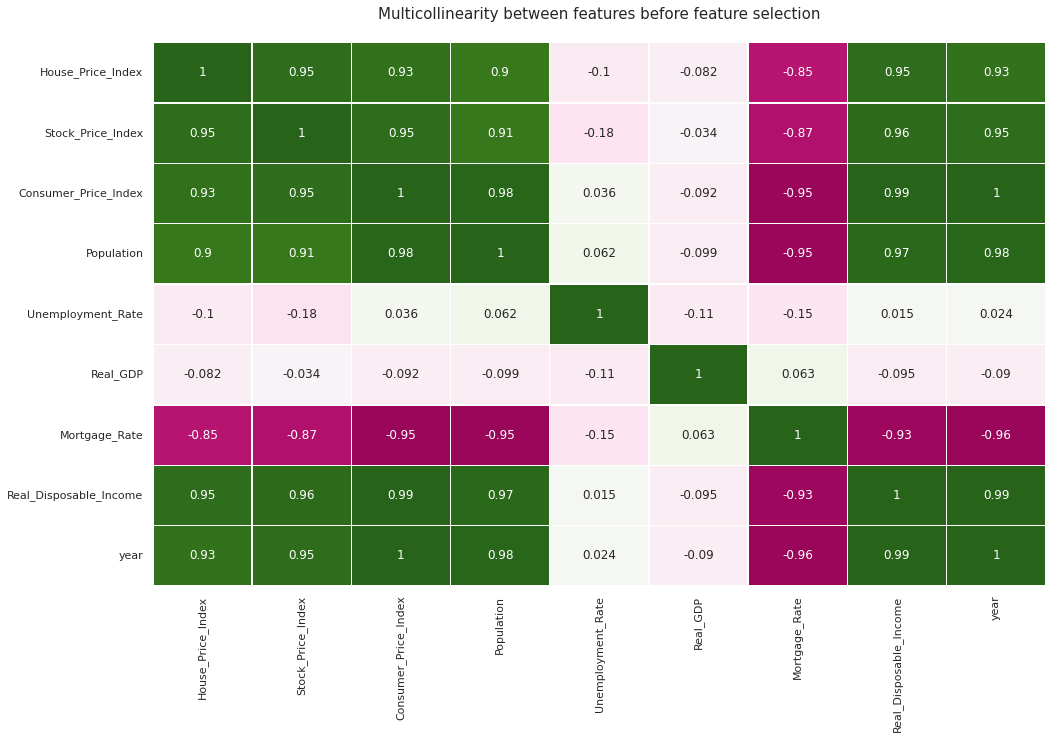

In [9]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.title('Multicollinearity between features before feature selection\n', fontsize = 15)
plt.show()

In [10]:
del df['Date']
del df['year']
del df['Unemployment_Rate']
del df['Real_GDP']
# we are deleting these features as they are not of much meaning to us or they are overly corelated with other features.

In [11]:
df.head()

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Mortgage_Rate,Real_Disposable_Income
0,63.735,14.97068,46.91647,153968000.0,9.2040,6159.5
1,64.134,15.86818,47.08523,154123000.0,9.0825,6192.1
2,64.470,16.48206,47.29619,154229000.0,9.0350,6200.0
3,64.974,16.22884,47.54933,154362000.0,9.8325,5967.2
4,65.549,16.14232,47.71810,154490000.0,10.5960,6209.1


# model building to find the best features and their importances.

## linear regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['House_Price_Index'])
y = df['House_Price_Index']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
x_train.head()

,Stock_Price_Index,Consumer_Price_Index,Population,Mortgage_Rate,Real_Disposable_Income
288,75.83663,92.91443,199321000.0,4.7550,12084.4
120,39.96730,67.12599,170318000.0,7.8240,8110.8
175,59.86570,74.88914,181776000.0,6.9500,9982.1
30,18.33109,52.48569,157284000.0,9.8825,6683.9
221,67.79820,82.06162,190878000.0,5.5820,10824.4


In [13]:
from sklearn import linear_model
features = list(df.columns)
features.remove('House_Price_Index')

In [14]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: -160.60202013435617
coefficients: [6.04588584e-01 1.92414343e-01 3.75730622e-07 7.17651433e+00
 1.19320147e-02]


In [15]:
import itertools

combinations = []
for x in range(1,20): 
    combinations.append(itertools.combinations(df[features], x))

best_score = 0
bestfeatures = []
for item in combinations:
    for group in item:
        group = list(group)
        x = df[group]
        linreg = linear_model.LinearRegression()
        linreg.fit(x, y)
        score = linreg.score(x, y)
        if score > best_score:
          best_score = score
          bestfeatures = x.columns

In [16]:
print('R2 =',best_score.round(2),'\n')
print('Best combination Features are...\n')
for i in range(len(bestfeatures)):
  print(i+1,' ',bestfeatures[i])

R2 = 0.93 

Best combination Features are...

1   Stock_Price_Index
2   Consumer_Price_Index
3   Population
4   Mortgage_Rate
5   Real_Disposable_Income


Text(0.5, 1.0, 'Feature Importances of Linear Regression')

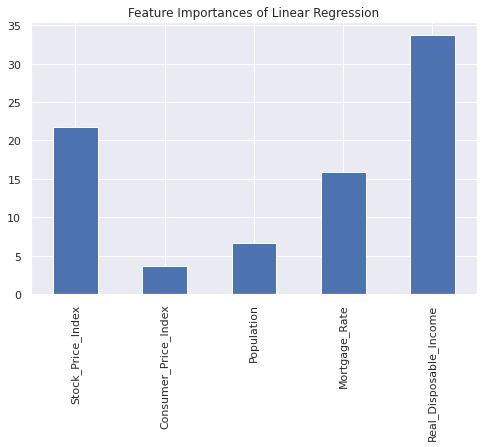

In [17]:
# feature importance by score.
# ( coeffecient * standard deviation(coeffecient) ) will generally give us the result.

imp_y = x.columns
imp_x = linreg.coef_
impdf = pd.DataFrame(imp_x,imp_y,columns=['Coefficients'])
impdf['Coefficients'] = impdf['Coefficients'].abs()
stdev = []
for i in x.columns:
  stdev.append(df[i].std())
impdf['std'] = np.array(stdev).reshape(-1,1)
impdf['importance'] = impdf['Coefficients'] * impdf['std']
plt.figure(figsize = (8,5))
impdf['importance'].plot.bar() 
plt.title('Feature Importances of Linear Regression')

## XGBOOST 

In [18]:
# scaling and spliting.
from sklearn.preprocessing import StandardScaler

x1 = df.drop(columns=['House_Price_Index'])
y1 = df['House_Price_Index']
x1_train, x1_test, y1_train, y1_test = train_test_split(x,y,test_size = 0.3)
x1_train.head()

scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

In [19]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
score = -70
l = 0
for lr in np.arange(0.01, 0.35, 0.01):
  lr = round(lr,2)
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x1_train,y1_train) 
  model.score(x1_test, y1_test)
  s = np.mean(cross_val_score(model, x1_train, y1_train, cv=10))
  t = model.score(x1_train,y1_train)
  if s > score and t > s:
    score = s
    l = lr
print('The best score obtained = ',score)
print('The learning rate =',l)  

The best score obtained =  0.9950745252231916
The learning rate = 0.22


In [20]:
fimp = model.feature_importances_.round(3)
fimp.tolist()
Fea = df.columns[1:].tolist()

val = {
    'Feature' : Fea,
    'Importances' : fimp
}

Feature = pd.DataFrame(val).sort_values(by='Importances', ascending = False)
Feature

,Feature,Importances
1,Consumer_Price_Index,0.882
0,Stock_Price_Index,0.059
2,Population,0.046
3,Mortgage_Rate,0.007
4,Real_Disposable_Income,0.006


In [21]:
fimp

array([0.059, 0.882, 0.046, 0.007, 0.006], dtype=float32)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


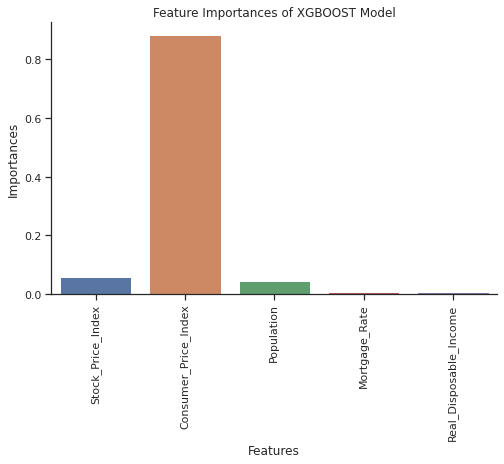

In [22]:
plt.figure(figsize = (8,5))
sns.set(style = 'ticks')
sns.barplot([Fea[x] for x in range(len(fimp))], fimp)
plt.title('Feature Importances of XGBOOST Model')
plt.ylabel('Importances')
plt.xlabel('Features')
plt.xticks(rotation = 90)
sns.despine()
plt.savefig('Feature Importances XGBoost.jpg', dpi = 400)
plt.show()